## Visualizaciones

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("/home/linar/Desktop/ML/Clases/i302/TPs/TP2/Data/toyota.csv")

In [18]:
df.head()

,Unnamed: 0,Modelo,Año,Color,Tipo de combustible,Transmisión,Motor,Kilómetros,Tipo de vendedor,Precio,km_bin
0,4377,Corolla Cross,2022.0,Gris,Nafta,Automática,2.0,74000,concesionaria,19138.755981,70k-80k
1,4378,Corolla Cross,2024.0,Blanco,Nafta,Automática,2.0,0,tienda,29747.368421,NaN
2,4379,Corolla Cross,2024.0,Blanco,Híbrido/Nafta,Automática,1.8,1111,particular,39900.000000,0-10k
3,4380,Corolla Cross,2024.0,Blanco,Híbrido/Nafta,Automática,1.8,0,concesionaria,40900.000000,NaN
4,4381,Corolla Cross,2022.0,Gris,Nafta,Automática,2.0,74000,concesionaria,33014.353110,70k-80k


1. Distribución de Precio por modelo

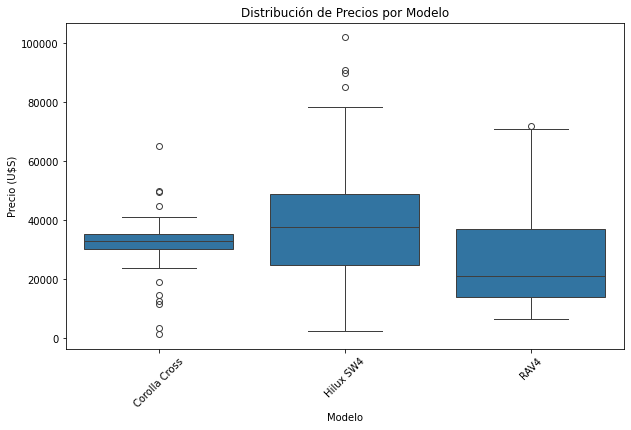

In [3]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Modelo', y='Precio', data=df)
plt.title('Distribución de Precios por Modelo')
plt.xlabel('Modelo')
plt.ylabel('Precio (U$S)')
plt.xticks(rotation=45)
plt.show()

2. Relación entre Km y Precio

We first change km to a numerical feature

In [13]:
df.describe()

,Unnamed: 0,Año,Kilómetros,Precio
count,1814.000000,1814.000000,1.814000e+03,1814.000000
mean,12215.730981,2018.248071,9.049424e+04,34906.338342
std,5068.526716,5.603972,1.102451e+05,13160.513060
min,4377.000000,1997.000000,0.000000e+00,1387.559809
25%,4830.250000,2015.000000,8.000000e+03,25900.000000
50%,15834.500000,2020.000000,5.750000e+04,34000.000000
75%,16287.750000,2023.000000,1.437500e+05,42000.000000
max,16741.000000,2024.000000,1.111111e+06,102000.000000


In [ ]:
df['Kilómetros'] = df['Kilómetros'].str.replace('km', '').str.replace(',', '').str.strip()
df['Kilómetros'] = df['Kilómetros'].astype(int)


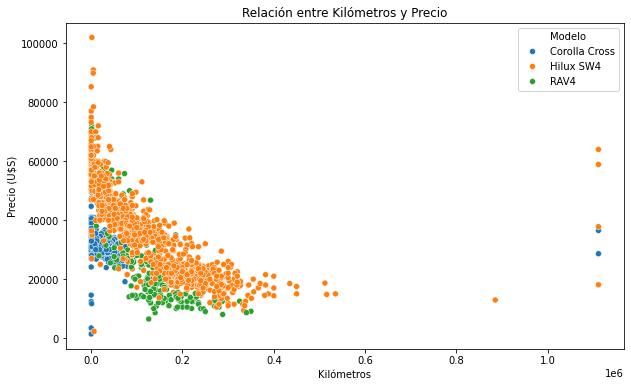

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Kilómetros', y='Precio', hue='Modelo', data=df)
plt.title('Relación entre Kilómetros y Precio')
plt.xlabel('Kilómetros')
plt.ylabel('Precio (U$S)')
plt.show()

We could group the km by intervals:

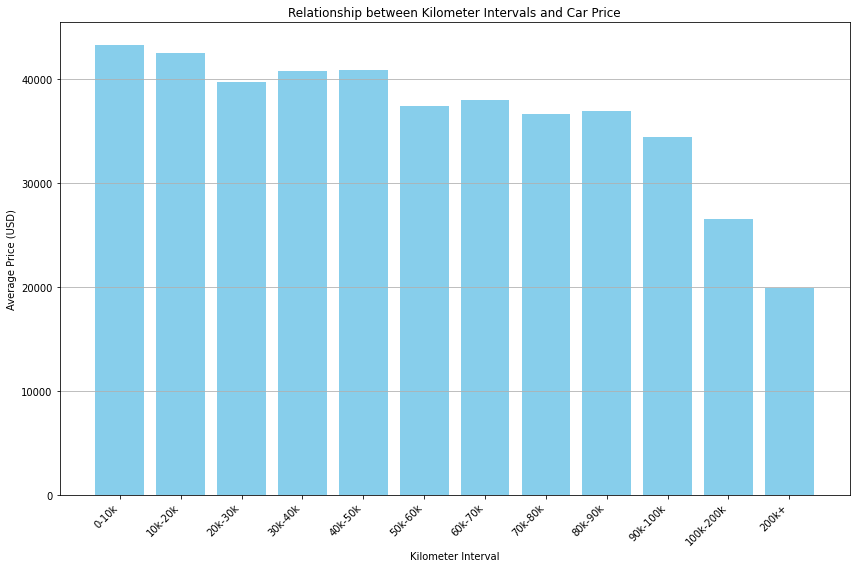

In [25]:
# Define kms intervals
bins = [0, 10_000, 20_000, 30_000, 40_000, 50_000, 60_000, 70_000, 80_000, 90_000, 100_000, 200_000, 1_111_111]
labels = ['0-10k', '10k-20k', '20k-30k', '30k-40k', '40k-50k', '50k-60k', '60k-70k', '70k-80k', '80k-90k', '90k-100k', '100k-200k', '200k+']

# Bin the data
df['km_bin'] = pd.cut(df['Kilómetros'], bins=bins, labels=labels)

# Aggregate data
grouped = df.groupby('km_bin')['Precio'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 8))
plt.bar(grouped['km_bin'], grouped['Precio'], color='skyblue')
plt.xlabel('Kilometer Interval')
plt.ylabel('Average Price (USD)')
plt.title('Relationship between Kilometer Intervals and Car Price')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

3. Distribución de precios según tipo de combustible

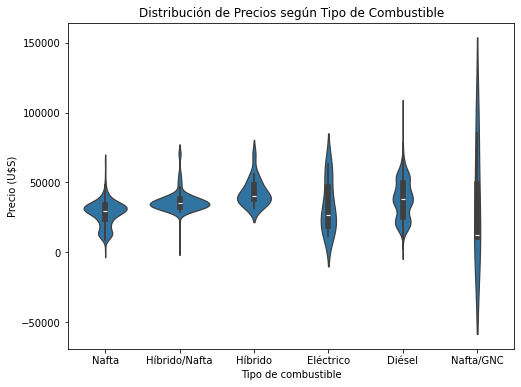

In [8]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Tipo de combustible', y='Precio', data=df)
plt.title('Distribución de Precios según Tipo de Combustible')
plt.xlabel('Tipo de combustible')
plt.ylabel('Precio (U$S)')
plt.show()

4. Distribución de modelos por año

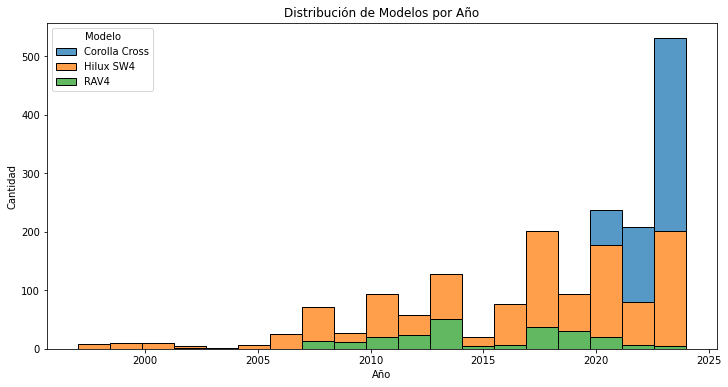

In [10]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Año', hue='Modelo', multiple='stack', bins=19)
plt.title('Distribución de Modelos por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.show()

5. Distribución de precios según el tipo de vendedor

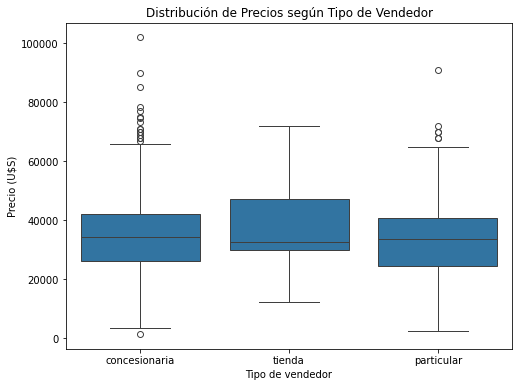

In [11]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Tipo de vendedor', y='Precio', data=df)
plt.title('Distribución de Precios según Tipo de Vendedor')
plt.xlabel('Tipo de vendedor')
plt.ylabel('Precio (U$S)')
plt.show()

6. Distribución de tipo de combustible según modelo

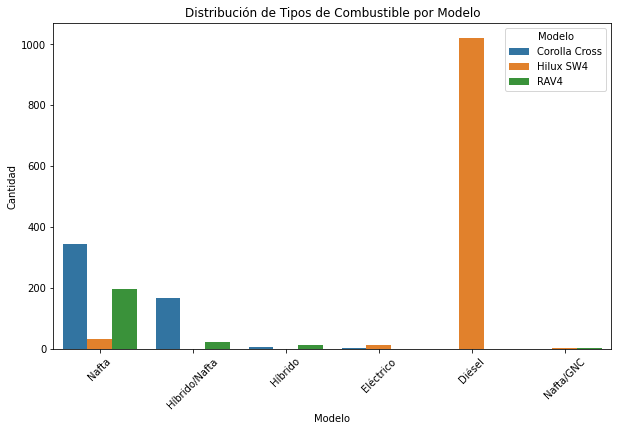

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(hue='Modelo', x='Tipo de combustible', data=df)
plt.title('Distribución de Tipos de Combustible por Modelo')
plt.xlabel('Modelo')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

<ipython-input-21-e1fd611c7ccf>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Color', y='Precio', data=df, palette='Set2')


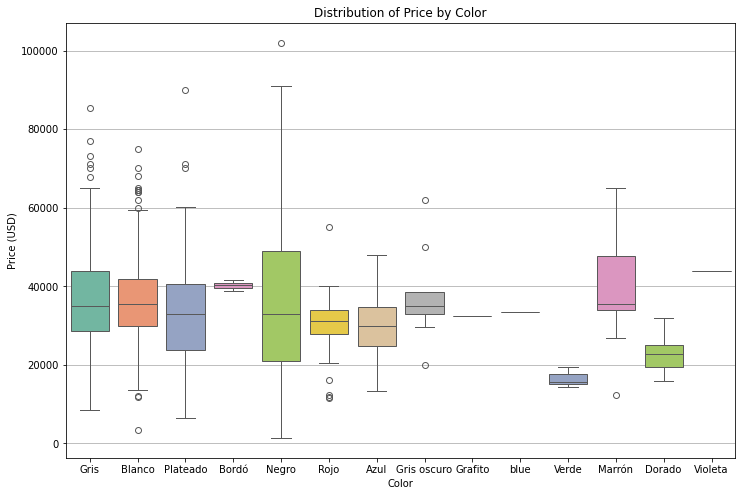

In [21]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Color', y='Precio', data=df, palette='Set2')
plt.xlabel('Color')
plt.ylabel('Price (USD)')
plt.title('Distribution of Price by Color')
plt.grid(axis='y')
plt.show()

<ipython-input-27-2f423442c5fe>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Año', y='Precio', data=df, palette='Set2')


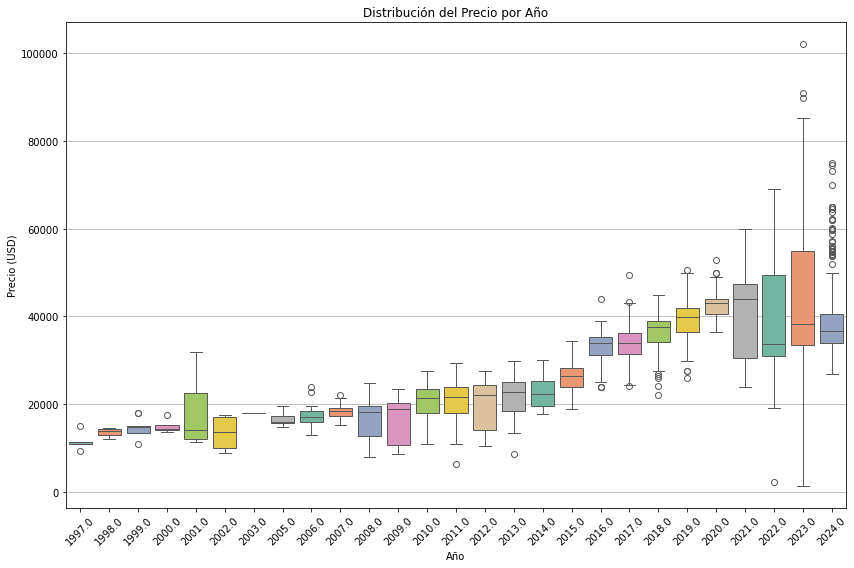

In [27]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Año', y='Precio', data=df, palette='Set2')
plt.xlabel('Año')
plt.ylabel('Precio (USD)')
plt.title('Distribución del Precio por Año')
plt.xticks(rotation=45)  # Rote las etiquetas del eje x para mejor visibilidad si es necesario
plt.grid(axis='y')
plt.tight_layout()
plt.show()

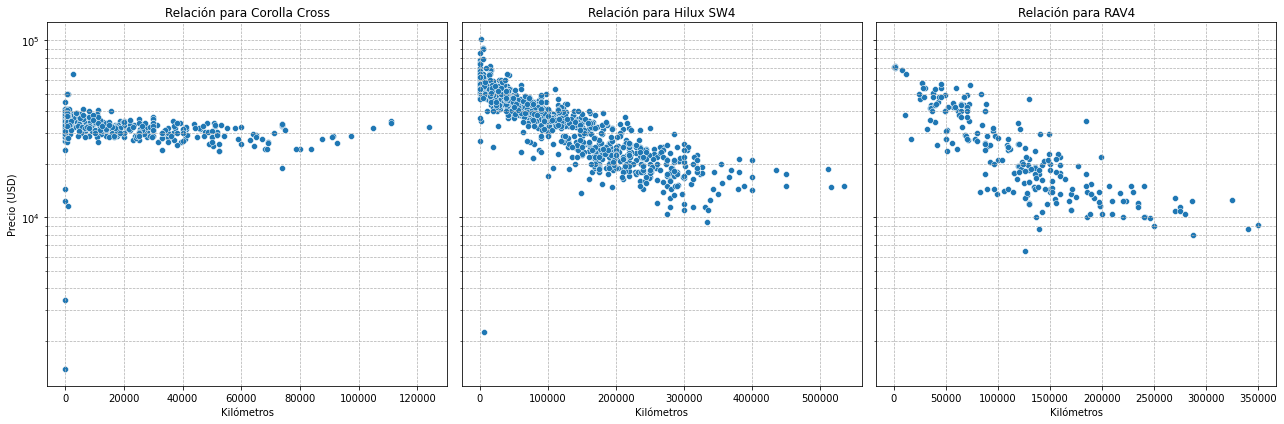

In [31]:
# Filter data for kilometers less than 600,000
df_filtered = df[df['Kilómetros'] < 600_000]

# Get unique models
modelos = df_filtered['Modelo'].unique()

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(modelos), figsize=(18, 6), sharey=True)

# Plot for each model
for i, modelo in enumerate(modelos):
    ax = axes[i]
    subset = df_filtered[df_filtered['Modelo'] == modelo]
    sns.scatterplot(x='Kilómetros', y='Precio', data=subset, ax=ax)
    ax.set_title(f'Relación para {modelo}')
    ax.set_xlabel('Kilómetros')
    ax.set_ylabel('Precio (USD)')
    ax.set_yscale('log')
    ax.grid(True, which='both', linestyle='--', linewidth=0.7)

# Adjust layout
plt.tight_layout()
plt.show()